# MATH 420
## Jack Mirenzi - Camilo Velez
## Team HW 1

In [13]:
using Pkg
Pkg.activate("../p2")
Pkg.instantiate()

  Activating project at `~/MATH420/p2`


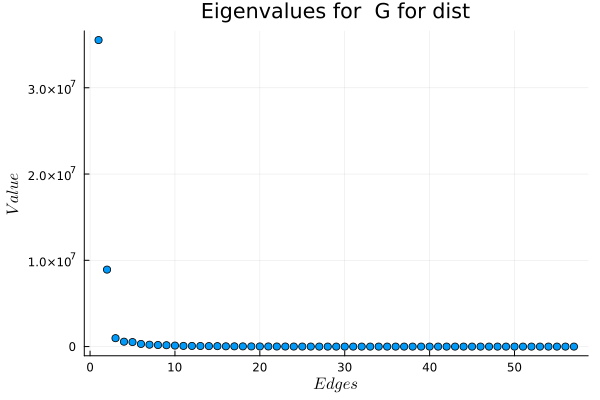

(typeof(S), size(S)) = (Matrix{Float64}, (57, 57))
The 10 largest eigenvalues are [3.553255787649086e7, 8.924037549458053e6, 975952.6526310514, 570066.7976405348, 526331.6068667914, 307163.98573833145, 220021.71828191378, 183279.62093742006, 159784.48540360667, 118556.26990565588]

For data dist
d = 2


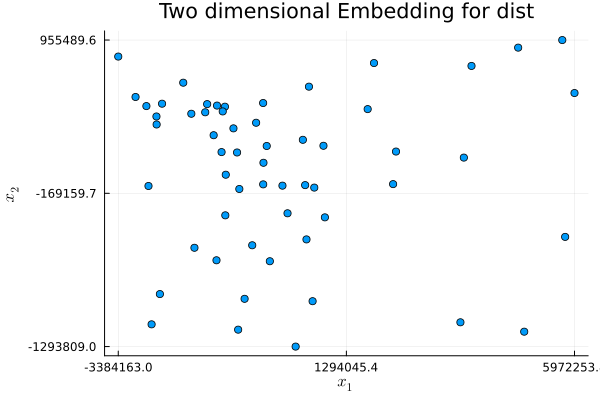

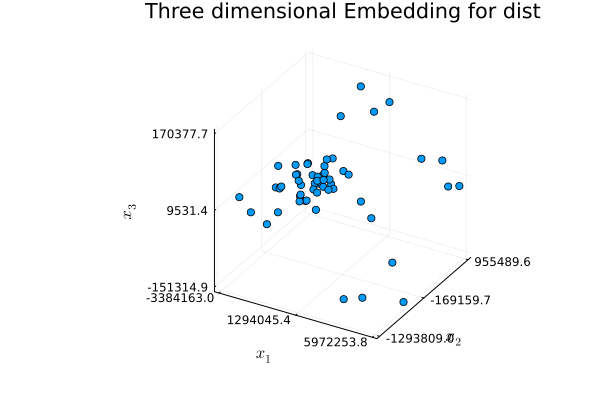

Norm = 1.955124836326575e8
ϵ = 3.1626792551000594e14
σ = 1.3405002003037902e6
Difference = 3.1626792416950575e14
d = 3
Norm = 1.9558186513794076e8
ϵ = 3.162680151509137e14
σ = 918943.527555919
Difference = 3.162680142319702e14


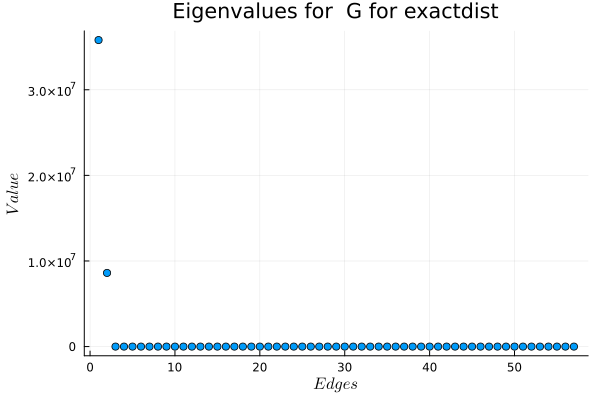

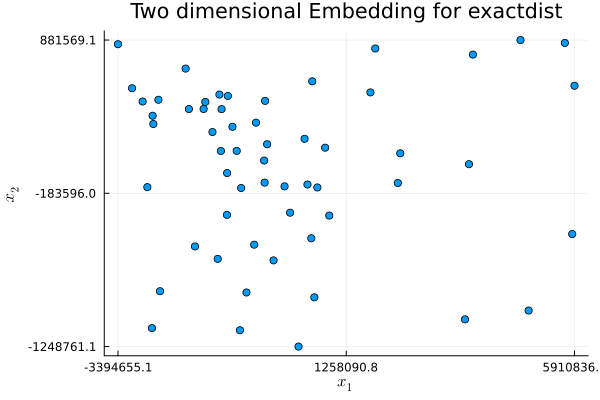

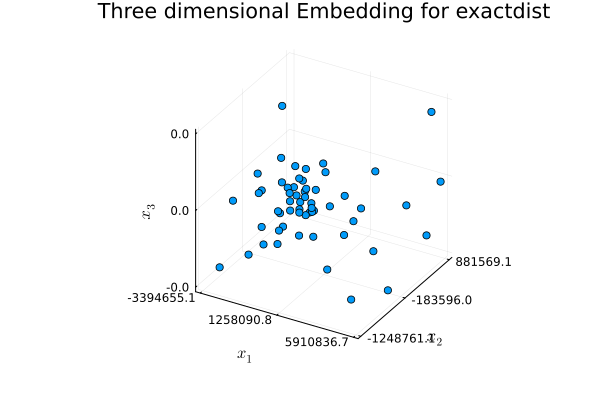

(typeof(S), size(S)) = (Matrix{Float64}, (57, 57))
The 10 largest eigenvalues are [3.5808397808099724e7, 8.605365074929597e6, 0.005358653140638646, 0.004923178034390562, 0.004657428774880333, 0.003988382366164188, 0.0036938401709721205, 0.0033920096133540443, 0.0027077685859467574, 0.002634030216556579]For data exactdist
d = 2
Norm = 1.9653660185684672e8
ϵ = 3.2109444295560906e14
σ = 0.012847670035085508
Difference = 3.2109444295560906e14
d = 3
Norm = 1.9653660185684672e8
ϵ = 3.2109444295560906e14
σ = 0.01167679159053366
Difference = 3.2109444295560906e14


In [22]:
using DelimitedFiles
using LinearAlgebra
using Plots
using LaTeXStrings
using Printf

for name = ("dist", "exactdist")
    (R, num_vert_) = readdlm("./kn57Nodes1to57_" * name * ".txt", Float64, header=true)
    num_vert = parse(Float64, num_vert_[1])
    # S = zeros(size(R))
    # rho = 0;
    # for i = 1:57, j = 1:57
    #     global S, R, rho
    #     S[i, j] = R[i, j]^2
    #     rho += S[i, j]
    # end
    S = R .^ 2
    # rho = norm(S, 1)
    # rho \= (2 * num_vert)
    
    one_col = ones(57,1)
    rho = 1/(2num_vert)*one_col'*S*one_col
    rho = rho[1]

    v = ((S - rho * I(57)) * one_col )/ num_vert
    function getGram(n::Real, S::Matrix, rho::Real)::Matrix
        r = 1 / 2n * (S - rho * I) * one_col * one_col' + 1 / 2n * one_col * one_col' * (S - rho * I) - 1 / 2 * S
        @assert issymmetric(r)
        return r
    end
    G = getGram(num_vert, S, rho)
    ev, Q = eigen(G, sortby=x -> -x)
    index = findfirst(x -> x < 0, ev)
    ev[index-1:end] .= 0
    display(scatter(ev, labels = nothing, title="Eigenvalues for  G for $(name)", xaxis=L"Edges", yaxis=L"Value"))
    print("The 10 largest eigenvalues are $(first(ev, 10))")
    Λ = Diagonal(ev)
    lambda = Λ
    Q[:, 1:2]

    Y::Dict{Int,Matrix} = Dict([])
    R_hat::Dict{Int,Matrix} = Dict([])
    R_norm::Dict{Int,Real} = Dict([])
    ϵ::Dict{Int,Real} = Dict([])
    σ::Dict{Int,Real} = Dict([])

    println("For data " * name)
    for d = (2, 3)
        println("d = $(d)")
        Q_1 = Q[:, 1:d]
        Λ_1 = Λ[1:d, 1:d]
        Y[d] = Λ_1^1 / 2 * Q_1'
        R_hat[d] = zeros(57, 57)
        for i = 1:57, j = 1:57
            R_hat[d][i, j] = norm(Y[d][1:d, j] - Y[d][1:d, i])
        end
        R_norm[d] = norm(R - R_hat[d])
        println("Norm = $(R_norm[d])")
        ϵ[d] = norm(G - Y[d]'Y[d])
        println("ϵ = $(ϵ[d])")
        σ[d] = sqrt(sum(ev[d+1:end] .^ 2))
        println("σ = $(σ[d])")
        println("Difference = $(ϵ[d] - σ[d])")
    end
    function minmax(v::Vector{<:Real})
        r1 = [minimum(v), minimum(v)+(maximum(v)-minimum(v))/2, maximum(v)] 
        r2 = [ @sprintf("%.1f",x) for x in r1 ]
        return (r1, r2)
    end
    
    display(scatter(Y[2][1, :], Y[2][2, :], labels=nothing,title="Two dimensional Embedding for " * name,xticks = minmax(Y[2][1,:]),
    yticks = minmax(Y[2][2,:]), xaxis = L"x_{1}", yaxis=L"x_{2}"))
    display(scatter3d(Y[3][1, :], Y[3][2, :], Y[3][3, :], title="Three dimensional Embedding for " * name, xticks = minmax(Y[3][1,:]),
    yticks = minmax(Y[3][2,:]), zticks = minmax(Y[3][3,:]), labels=nothing, xaxis=L"x_{1}",
    yaxis=L"x_{2}", zaxis=L"x_{3}"))
    # scatter3d(Y[3][1,:], Y[3][2,:], Y[3][3,:], camera=[0,0,0])
end